## CSE 6367 Programming Assignment 4 (P4)
## Spring 2023
## Panorama

#### NOTE: This is an optional programming assignment. If you submit all 4 programming assignments, we will count your best 3 out of 4 programming assignments towards your final grade.

## Dataset

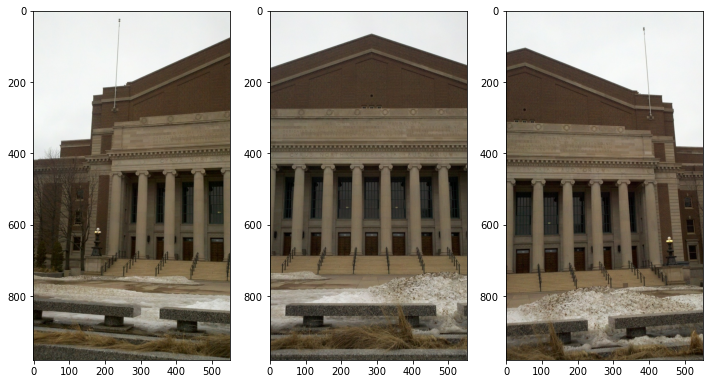

In [43]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("Images/mall1.jpg")
img2 = cv2.imread("Images/mall2.jpg")
img3 = cv2.imread("Images/mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

## Assignment Instructions:

In this assignment, you will perform image stitching and create a panorama of stitched images. Here are some basic steps you need to perform for image stiching:

    1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors
    4. Applying a warping transformation using the homography matrix obtained from Step #3
    
<b> You may use opencv or other libraries for doing different tasks of this programming assignment.<\b>

### Step1

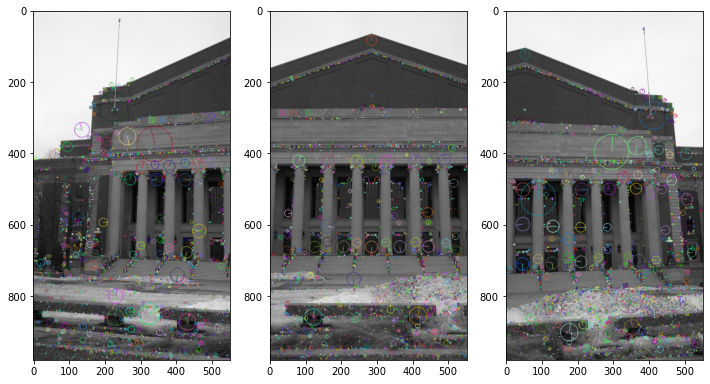

In [44]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fig, axes  = plt.subplots(1,3,figsize=(12,12))
img1 = cv.imread('./Images/mall1.jpg')
img2 = cv.imread('./Images/mall2.jpg')
img3 = cv.imread('./Images/mall3.jpg')
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create(nfeatures=0)
kp1, desc1 = sift.detectAndCompute(gray1,None)
kp2, desc2 = sift.detectAndCompute(gray2,None)
kp3, desc3 = sift.detectAndCompute(gray3,None)
img1=cv.drawKeypoints(gray1,kp1,img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2=cv.drawKeypoints(gray2,kp2,img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3=cv.drawKeypoints(gray3,kp3,img3, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(img3)
plt.show()

### Step2

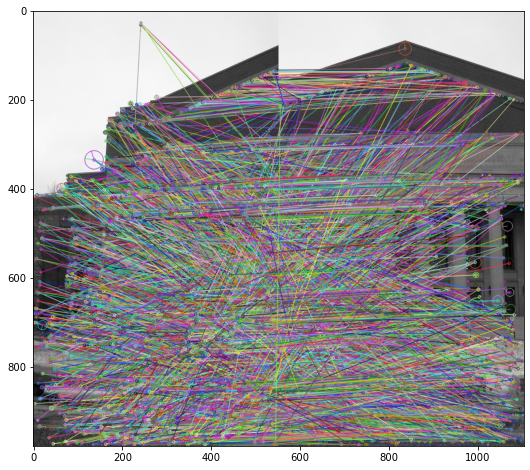

In [45]:
bf = cv.BFMatcher()
matches12 = bf.knnMatch(desc1,desc2,k=2)
good12 = []
for m,n in matches12:
    if m.distance < 0.75*n.distance:
        good12.append([m])
match12 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches12,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(match12)

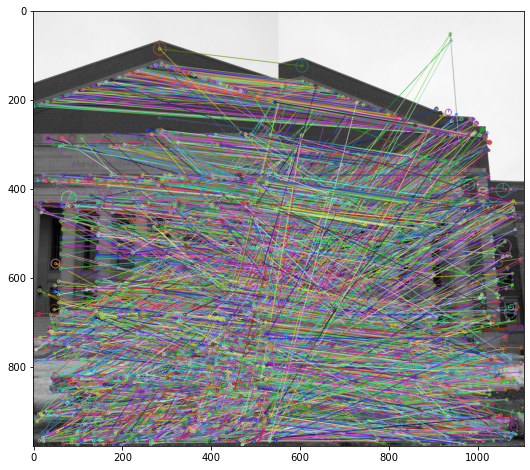

In [46]:
matches23 = bf.knnMatch(desc2,desc3,k=2)
good23 = []
for m,n in matches23:
    if m.distance < 0.75*n.distance:
        good23.append([m])
match23 = cv.drawMatchesKnn(img2,kp2,img3,kp3,matches23,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(match23)

### Step 3 & 4

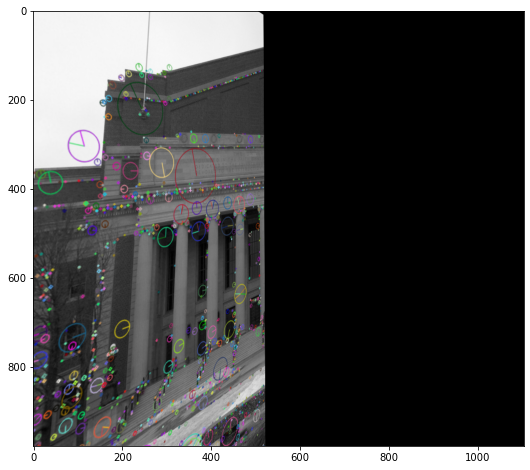

In [65]:
src_pts12 = np.float32([kp1[matches12.index(m)].pt for m in matches12]).reshape(-1, 1, 2)
dst_pts12 = np.float32([kp2[matches12.index(m)].pt for m in matches12]).reshape(-1, 1, 2)
M12, mask12 = cv.findHomography(src_pts12, dst_pts12, cv.RANSAC, 5.0)

# Apply a warping transformation to one of the images using the homography matrix
warped_img12 = cv.warpPerspective(img1, M12, (img1.shape[1]+img2.shape[1], img1.shape[0]))
plt.imshow(warped_img12)

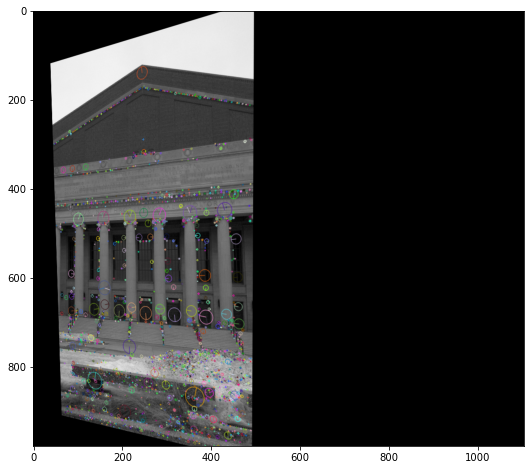

In [64]:
src_pts23 = np.float32([kp2[matches23.index(m)].pt for m in matches23]).reshape(-1, 1, 2)
dst_pts23 = np.float32([kp3[matches23.index(m)].pt for m in matches23]).reshape(-1, 1, 2)
M23, mask23 = cv.findHomography(src_pts23, dst_pts23, cv.RANSAC, 5.0)

# Apply a warping transformation to one of the images using the homography matrix
warped_img23 = cv.warpPerspective(img2, M23, (img2.shape[1]+img3.shape[1], img2.shape[0]))
plt.imshow(warped_img23)

### Submission Guidelines:
        
        Submit through Canvas your source code in a single .ipynb file. 
        The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
        The images are available in the ./Images directory. Your TA will use the same directory name to grade your submission.
        You don't need to attach the images folder with your submission.